<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/sesion16_g44_24oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadistica aplicada
sesion16 - 26 oct

Yessica Abigail Santiago Hernandez 1990002

Gpo 44

In [ ]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA

#pmdarima
import pmdarima as pm

In [ ]:
#datos
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [ ]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
#asignar el formato mensual
pasajeros = pasajeros.asfreq('MS')

In [ ]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

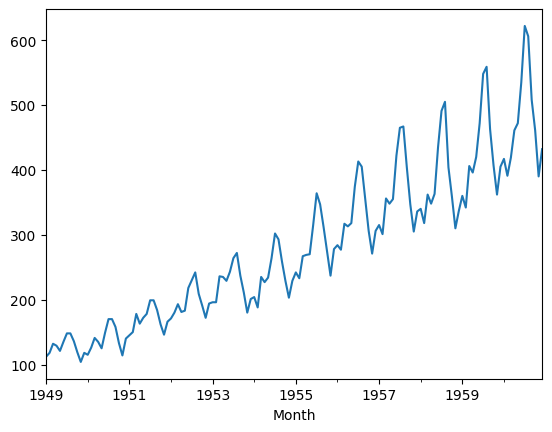

In [ ]:
#graficar la serie de tiempo
pasajeros['Thousands of Passengers'].plot();

Es una serie con componente estacional


In [ ]:
## prueba de dickey-fuller
prueba_adf = adfuller(pasajeros['Thousands of Passengers'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.99

No rechazamos Ho, significa que thousands of passengers es una serie no estacionaria

In [ ]:
#aplicando primeras diferencias
pasajeros['1eras diff'] = pasajeros['Thousands of Passengers'].diff()


In [ ]:
pasajeros.head()

,Thousands of Passengers,1eras diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


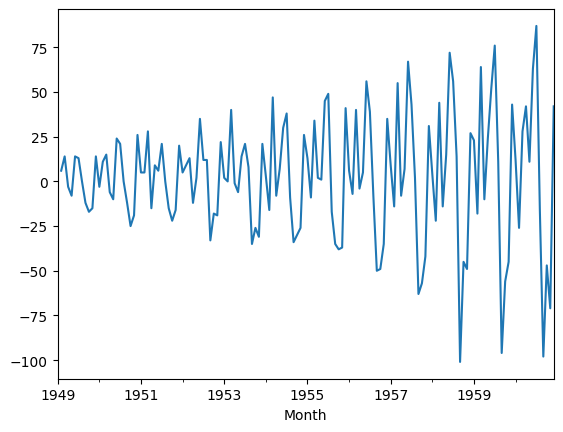

In [ ]:
pasajeros['1eras diff'].plot();

In [ ]:
##prueba de dickey-fuller
prueba_adf1 = adfuller(pasajeros['1eras diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.05

Rechazar Ho, significa que las primeras diferencias son estacionarias

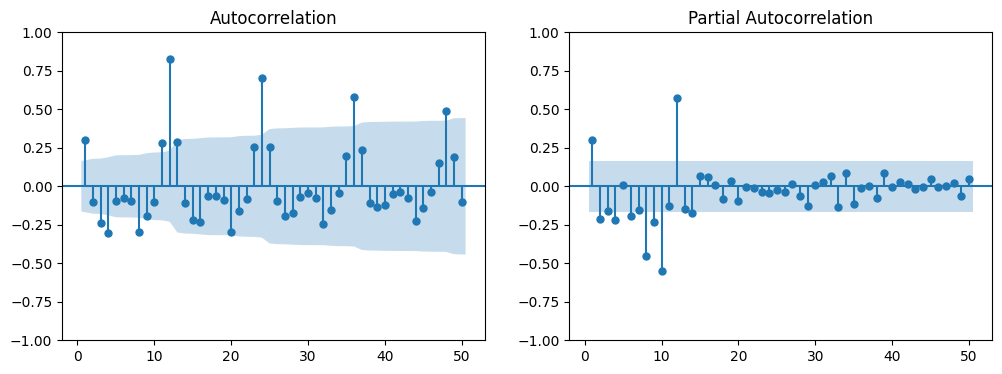

In [ ]:
# grafica de correlaciones
ig, ax = plt.subplots(1,2,figsize = (12,4))

##primer subgrafica
plot_acf(pasajeros['1eras diff'].dropna(),zero = False, lags = 50, ax=ax[0])

##segunda subgrafica
plot_pacf(pasajeros['1eras diff'].dropna(), zero = False, lags = 50, ax = ax[1])

plt.show()

El patron de las graficas de autocorrelacion, nos muestan una serie con componente estacional.

Encontrar el orden del ARIMA(p,I(d),q) utilizando pmdarima

In [ ]:
#Encontrar el orden del arima
pm.auto_arima(pasajeros['Thousands of Passengers'],
              start_p = 1, start_q=1,
              max_p =7, max_q=7,
              m = 12,
              seasonal = True,
              start_P = 1, start_Q=1,
              max_P=7, max_Q=7,
              suppress_warnings = True,
              error_action = 'ignore')

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Thousands of passengers es un ARIMA(0,1,1)(2,1,0)

In [ ]:
model = ARIMA(pasajeros['Thousands of Passengers'],
              order=(0,1,1),
              seasonal_order =(2,1,0,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:           Thousands of Passengers   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                           Tue, 24 Oct 2023   AIC                           1019.178
Time:                                   18:09:14   BIC                           1030.679
Sample:                               01-01-1949   HQIC                          1023.851
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372

In [ ]:
pasajeros.tail()

,Thousands of Passengers,1eras diff
Month,,
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0
1960-11-01,390,-71.0
1960-12-01,432,42.0


In [ ]:
pronostico = results.predict('1961-01-01','1964-12-01')

In [ ]:
pronostico = pd.DataFrame(pronostico)

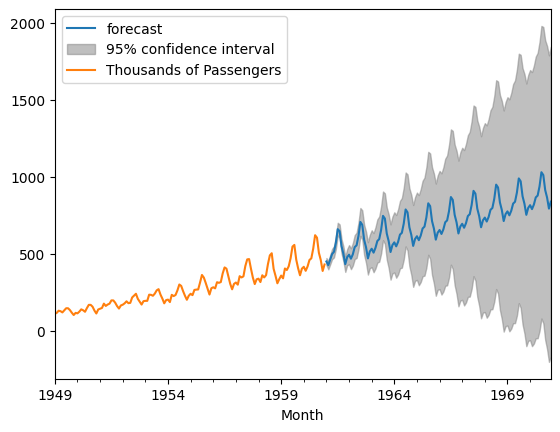

In [ ]:
plot_predict(results, start = '1961-01-01',end = '1970-12-01')
pasajeros['Thousands of Passengers'].plot()
plt.legend(loc ='upper left')
plt.show()